<a href="https://colab.research.google.com/github/gguex/ISH_ressources_cours_ML/blob/main/TP01_prise_en_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning (Lettres) TP 1 : Prise en main

## Les notebooks

Ce que vous avez devant les yeux est un **Jupyter Notebook**. C'est un rapport interactif, qui permet d'écrire du texte formaté (dans un langage de balises appelé **Markdown**, voir p.ex. https://www.markdowntutorial.com/) ainsi que du code **Python**, comme ci-dessous.

In [1]:
# Un exemple de code en Python
a = 10
b = 12
print(f"Le résultat de a + b est égal à {a + b}")

Le résultat de a + b est égal à 22


Vous devez normalement voir le résultat de votre sortie juste après le bloc de code. Remarquez que vous pouvez à tout moment modifier une partie du code pour changer son execution. (Faites le ! C'est en testant des choses que l'on apprend le mieux) Pour plus de détails à propros des Jupyter Notebooks https://docs.jupyter.org/en/latest/.

Les notebooks peuvent s'executer en local (sur votre machine, voir https://docs.jupyter.org/en/latest/install/notebook-classic.html), mais également sur un environnement d'execution distant (un serveur). Il existe plusieurs services proposant des serveurs pour des Jupyter Notebooks, p.ex. :

* Google Colab: https://colab.research.google.com/
* Paperspace Gradient : https://www.paperspace.com/gradient
* Kaggle : https://www.kaggle.com/
* Amazon SageMaker : https://aws.amazon.com/fr/sagemaker/

L'avantage des serveurs, c'est que l'installation (parfois fastidieuse) des différentes librairies Python est déjà faite, et qu'ils disposent de GPU (Graphical Processing Units) ou de TPU (Tensor Processing Units), utiles pour l'entrainement de nombreux modèles de Machine Learning.

## Chargement et manipulation des données avec `pandas`

La première librairie python dont nous allons (re)voir l'utilisation est `pandas` https://pandas.pydata.org/, qui permet le chargement des fichiers de données ainsi que leur manipulation. On commence par la charger (on utilise fréquemment l'alias `pd` pour cette dernière).

In [2]:
import pandas as pd

Vérifiez que le chemin d'accès contenu dans `file_path` pointe bien sur le fichier "iris.csv" dans la première ligne de code de ce qui suit. Le chargement s'effectue ensuite facilement avec la fonction `pd.read_csv(file_path)` (il existe plusieurs options dans cette fonction pour, p.ex., changer le séparateur ou formater les variables).

In [3]:
file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP1/iris.csv"
my_df = pd.read_csv(file_path)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


L'objet `my_df` est un objet de classe **DataFrame**.



In [4]:
type(my_df)

pandas.core.frame.DataFrame

Cet objet possède un index (pour lister les lignes), des noms de columns, et les types de ses variables.

In [5]:
print(my_df.index)
print(my_df.columns)
print(my_df.dtypes)

RangeIndex(start=0, stop=150, step=1)
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object


Il est possible d'accéder aux lignes et colonnes (variables) grâce à leur nom (Notez qu'ici, les lignes n'ont pas de nom, on utilise alors le "slicing").

In [6]:
my_df["sepal.length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [7]:
my_df[1:3]

,sepal.length,sepal.width,petal.length,petal.width,variety
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


Notez qu'une colonne est un objet de la classe **Series**.

In [8]:
type(my_df["sepal.length"])

pandas.core.series.Series

Plusieurs opérations sont possibles sur ce type d'objet.

In [9]:
my_df["sepal.length"] + my_df["sepal.width"]

0      8.6
1      7.9
2      7.9
3      7.7
4      8.6
      ... 
145    9.7
146    8.8
147    9.5
148    9.6
149    8.9
Length: 150, dtype: float64

In [10]:
my_df["sepal.length"] < 5

0      False
1       True
2       True
3       True
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal.length, Length: 150, dtype: bool

Ajouter une colonne à notre DataFrame est également très aisé.

In [11]:
my_df["sepal.length.cat"] = my_df["sepal.length"] < 5
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length.cat
0,5.1,3.5,1.4,0.2,Setosa,False
1,4.9,3.0,1.4,0.2,Setosa,True
2,4.7,3.2,1.3,0.2,Setosa,True
3,4.6,3.1,1.5,0.2,Setosa,True
4,5.0,3.6,1.4,0.2,Setosa,False
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,False
146,6.3,2.5,5.0,1.9,Virginica,False
147,6.5,3.0,5.2,2.0,Virginica,False
148,6.2,3.4,5.4,2.3,Virginica,False


Pour sélectionner plusieurs lignes et colonnes, on peut utiliser `my_df.loc`, qui va sélectionner en utilisant les labels.

In [12]:
my_df.loc[1:5, ["sepal.length", "sepal.length.cat"]]

,sepal.length,sepal.length.cat
1,4.9,True
2,4.7,True
3,4.6,True
4,5.0,False
5,5.4,False


Ou avec `my_df.iloc` pour faire des accessions avec des indices.

In [13]:
my_df.iloc[:, 3:5]

,petal.width,variety
0,0.2,Setosa
1,0.2,Setosa
2,0.2,Setosa
3,0.2,Setosa
4,0.2,Setosa
...,...,...
145,2.3,Virginica
146,1.9,Virginica
147,2.0,Virginica
148,2.3,Virginica


On peut égalament transformer un Dataframe en un objet `numpy.ndarray`, propice aux opérations mathématiques.

In [14]:
my_df.iloc[:, :4].to_numpy()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Bien entendu, il existe encore de nombreuses fonctionnalités dans `pandas`. Pour en savoir plus, la communauté propose de nombreux tutoriels https://pandas.pydata.org/docs/getting_started/tutorials.html.

## Opérations mathématiques avec `numpy`

La librairie `numpy` https://numpy.org/ est la référence pour tout ce qui est opérations mathématiques et est utilisé de manière quasiment systématique dans tout projet de Machine Learning. On l'importe fréquemment sous l'alias `np`.



In [15]:
import numpy as np

Les objets essentiels dans numpy, permettant de représenter les vecteurs ou les matrices, sont les **Arrays** (`numpy.array`). Elles peuvent être créées à partir de listes (ou listes de listes pour un tableau).

In [16]:
a = np.array([1, 2, 3, 4, 5, 6])
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

array([1, 2, 3, 4, 5, 6])

In [17]:
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

On peut obtenir plusieurs information sur une Array.

In [18]:
b.ndim # Combien d'axes

2

In [19]:
b.size # Combien d'éléments

12

In [20]:
b.shape # Sa forme

(3, 4)

In [21]:
b.dtype # Le type de ses éléments

dtype('int64')

Les crochets permettent l'accession et la modification.

In [22]:
b[:3, :3]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [23]:
b[0, 0] = 100
b

array([[100,   2,   3,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,  12]])

Il est aussi possible de les redimmensionner les Arrays,

In [24]:
c = b.reshape([2, 6])
c

array([[100,   2,   3,   4,   5,   6],
       [  7,   8,   9,  10,  11,  12]])

de les transposer,

In [25]:
c.T

array([[100,   7],
       [  2,   8],
       [  3,   9],
       [  4,  10],
       [  5,  11],
       [  6,  12]])

et de faire de nombreuses opérations mathématiques sur ces dernières. Les opérateurs classiques agissent sur chaque élément.

In [26]:
b / 10

array([[10. ,  0.2,  0.3,  0.4],
       [ 0.5,  0.6,  0.7,  0.8],
       [ 0.9,  1. ,  1.1,  1.2]])

In [27]:
print(c.shape)
print(a.shape)
c + a # L'objet le plus petit (a) est dupliqué pour avoir une taille suffisante

(2, 6)
(6,)


array([[101,   4,   6,   8,  10,  12],
       [  8,  10,  12,  14,  16,  18]])

In [28]:
np.cos(a)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362,  0.28366219,
        0.96017029])

L'opérateur `@` effectue la multiplication matricielle.

In [29]:
e = np.array([1, 10, 100, 1000])
b @ e

array([ 4420,  8765, 13209])

`b` est (3 x 4), `e` est (4 x 1), l'opération est donc valide et le résultat est bien de dimension (3 x 1).

Il existe encore de nombreuses fonctionnalités dans `numpy`, pour voir plus loin https://numpy.org/doc/stable/user/whatisnumpy.html.

## Graphiques avec `matplotlib`

La dernière librairie que nous allons voir aujourd'hui est `matplotlib` https://matplotlib.org/, qui permet l'affichage de nombreux types de graphiques. On importe généralement uniquement son module `pyplot` avec l'alias `plt`.

In [30]:
import matplotlib.pyplot as plt

Cette librairie est longue à prendre en main et nous n'avons malheureusement pas le temps de la voir en détail. Nous verrons de nombreux exemples d'utilisation durant ce cours ce qui permettra de voir son fonctionnement. Par exemple, pour faire un nuage de points (scatterplot) de nos Iris, on peut faire :

[]

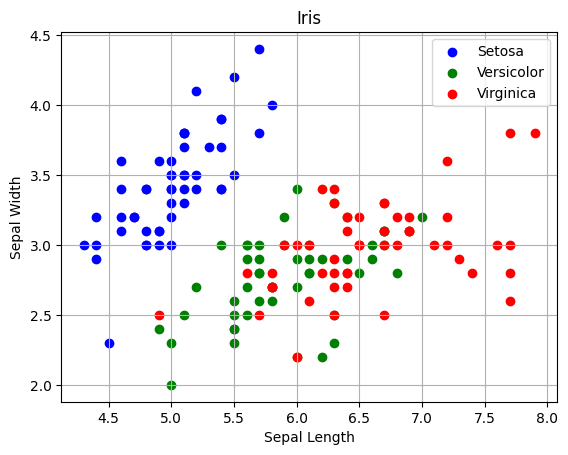

In [32]:
# Création d'un dictionnaire pour les couleurs
colors = {"Setosa": "blue", "Versicolor": "green", "Virginica": "red"}

# Création des objets servant à l'affichage graphique
fig, ax = plt.subplots()

# On fait une boucle sur les espèces
for species in my_df["variety"].unique():

  # Selection de l'espèce
  species_df = my_df[my_df["variety"] == species]

  # Scatter plot de l'espèce
  ax.scatter(x=species_df["sepal.length"],
            y=species_df["sepal.width"],
            c=colors[species],
            label=species)

# Ajout du nom des axes, d'un titre, d'une légende, et d'une grille
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Iris")
ax.legend()
ax.grid(True)

plt.plot()

Si vous voulez une réelle prise en main, vous pouvez suivre les tutoriels à https://matplotlib.org/stable/tutorials/index.html.